In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Lets take some insight form dataset


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Missing** **Value**

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As we can see RowNumber , CustomerId  , Surname  is not requried while predicting the otpt so we will drop this columns

In [6]:
data.drop(['RowNumber' , 'CustomerId' , 'Surname'],axis=1,inplace=True)

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
x=data.drop(['Exited'] ,axis=1)
y=data.Exited

In [9]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Dealing with categoraical Variable

In [11]:
x=pd.get_dummies(x,columns=['Geography'	,'Gender'] , drop_first= True)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


Scaling the feature

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [14]:
x

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 0.        ,
        0.        ],
       [0.844     , 0.32432432, 0.3       , ..., 1.        , 0.        ,
        1.        ],
       [0.884     , 0.13513514, 0.4       , ..., 0.        , 0.        ,
        0.        ]])

Spliting the dataset into Train , Test

In [15]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size = 0.2, random_state = 0)

**Bulding Artifical Neural Network**

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# Initialising the ANN
ann=Sequential()


Adding the input and 1st hidden layer . In this we are adding 12 neuron in 1st hidden layer and activation function is 'Rectifier(Rectified liner unit)'

In [18]:
ann.add(Dense(units=12 , activation='relu'))

Adding the 2st hidden layer . In this we are adding 6 neuron in 2st hidden layer and activation function is rectified liner unit

In [19]:
ann.add(Dense(units=6 , activation='relu'))

Adding the output layer 

In [20]:
ann.add(Dense(units=1 , activation='sigmoid'))

Traning of ANN

Compling the ANN

In [21]:
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


Here we use stochastic gradient descent method for optimization and as we have binary output we use loss function as binary entropy 

In [22]:
ann.fit(x_train ,y_train ,batch_size=32,validation_split=0.10 ,epochs=100)

Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5418 - accuracy: 0.7611 - val_loss: 0.4797 - val_accuracy: 0.7950
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7961 - val_loss: 0.4674 - val_accuracy: 0.7950
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7961 - val_loss: 0.4581 - val_accuracy: 0.7950
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7961 - val_loss: 0.4464 - val_accuracy: 0.7950
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7972 - val_loss: 0.4353 - val_accuracy: 0.8012
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8040 - val_loss: 0.4221 - val_accuracy: 0.8188
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8138 - val_loss: 0.4025 - val_accuracy: 0.8200

In [23]:
loss_df = pd.DataFrame(ann.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.541801,0.761111,0.479685,0.79500
1,0.475617,0.796111,0.467431,0.79500
2,0.468350,0.796111,0.458113,0.79500
3,0.461167,0.796111,0.446413,0.79500
4,0.452167,0.797222,0.435335,0.80125


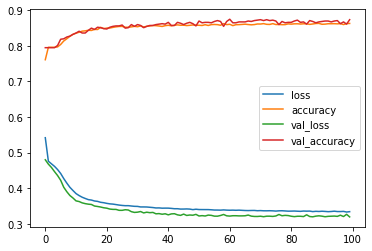

In [24]:
loss_df.plot();


In [25]:
import matplotlib.pyplot as plt


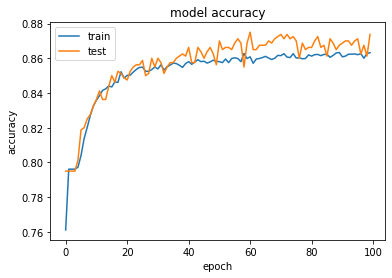

In [26]:
# summarize history for accuracy
plt.plot(loss_df['accuracy'])
plt.plot(loss_df['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluate the model

In [28]:
loss , accuracy=ann.evaluate(x_test,y_test)
print("loss : ", loss)
print("accuracy : ", accuracy)

63/63 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8645
loss :  0.3332112431526184
accuracy :  0.8644999861717224


Predicting the otput

In [29]:
y_pred=ann.predict(x_test)
y_pred=(y_pred>0.5)

As we use sigmoid function at output so it will give us probability and y_pred>0.5 mean if its prob. is >0.5 it will give output 1 otherwise 0

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix ,classification_report
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [36]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.86      0.86      2000



In [31]:
cm

array([[1519,   76],
       [ 195,  210]])

In [32]:
score

0.8645